## Least-Square Linear Regression

You have heard about (linear) classification methods and least-squares linear regression in the lecture. 

__Task:__ Describe the difference between regression and classification in one sentence. 

__Answer:__ In linear classification we want to draw a line, so that it best separates two classes, whereas in least-squares lin regression, we want to construct a lin model which minimizes the squared error of our data.

In the next part, we want to implement a least-squares linear regression. This means that given a set of points $\{\mathbf{x_i},y_i\}$, $i = 1..N$, we want to find that line (or hyperplane in higher dimensions) which minimizes the least-square error. The least-squares error measures the quadratic distance from the predicted points by the linear model to the actual values.

The general formula of the least-squares regression is $\mathbf{y} = \mathbf X \boldsymbol w+ \mathbf{\epsilon}$ where $\epsilon$ is a vector with dimensionality $\mathbb{R}^N$ containing the normally-distributed noise terms $N(0,\sigma^2)$, $\mathbf{y}$ is the vector of labels and $\mathbf{X}$ is the matrix of data points with dimensionality $\mathbb{R}^{NxD}$. We are interested in estimating the coefficients $\hat{\boldsymbol w}$ of the true coefficients $\boldsymbol w$. You saw in the lecture that the estimates are given by:

\begin{equation}
\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

where $\mathbf{X}$ is the matrix of regressor data (the first column is all 1’s for the intercept), and $\mathbf{y}$ is the vector of the dependent variable data. 

__Tasks:__ 
1.  Look at how the following data is generated. What are the real parameters of w?
2.  We want to implement a least-square linear regression now. Follow the following steps:
    1. ) Bring the data in the correct shape as requested by the formula above.    
    2. ) Calculate the estimates of the coefficients w.
    3. ) Add the resulting line to the given scatter plot of the data.
    4. ) Compute the mean squared-error of the residuals, i.e. $ \frac{1}{N}\sum_{i=1}^N \|y(x_i) - y_i \|^2$.
    5. ) Compare your results to the numpy built-in function np.linalg.lstsq(...)
3. Plot the residuals (e.g. using seaborn function residplot (you will need to install statsmodel with '_sudo pip3 install statsmodels_' ) and check the conditions of the linear regression.

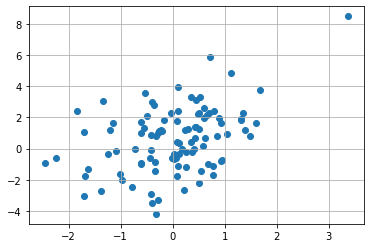

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate data
N_samples = 100
white_noise_stddev = 2
X = np.random.randn(N_samples,1)
eps = np.random.randn(N_samples,1)*white_noise_stddev
w = [1.3]
y = 0.5+w*X+eps

## Make Plot of the data
plt.scatter(X, y);
plt.grid()

(100, 2)
The estimator intercept is 0.59 and the estimated slope is 0.96.


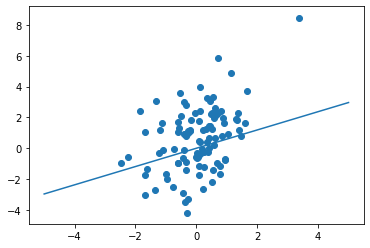

MSE is: 3.48
MSE from built-in function is: 3.48 


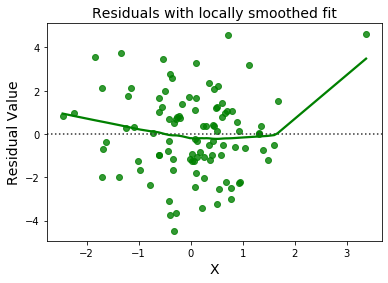

In [68]:
## 2. A) Bring the data in the correct shape
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
print(X_stacked.shape)

if (len(X) != len(y)):
    raise AssertionError
 
## B) Use the equation from above (X'X)^(-1)X'Y to calculate the estimate of the least-square coefficient:
# Hints:np.dot() computes the matrix-matrix product
#       np.linalg.inv() computes the matrix inverse
#       X.T is the transpose of X
w_est = np.dot(np.linalg.inv(np.dot(X_stacked.T,X_stacked)),np.dot(X_stacked.T,y))
print("The estimator intercept is %.2f and the estimated slope is %.2f." % (w_est[0],w_est[1]))

## C) Plot the resulting line
plt.plot([-5,5],[-5*w_est[0],w_est[0]*5])
plt.scatter(X, y);
plt.show()

## D) Compute the mean square-error (residual)
res_error=(np.dot(X_stacked,w_est)-y)*(np.dot(X_stacked,w_est)-y)
print("MSE is: %.2f" % ((sum(res_error)[0])/nrow))

## E) Compare to built-in function
beta_builtin,residual,_,_ = np.linalg.lstsq(X_stacked, y)
print("MSE from built-in function is: %.2f " % (residual[0]/nrow))

## 3) Plot the residuals
import seaborn as sns
plt.figure()
sns.residplot(np.squeeze(X), np.squeeze(y), lowess=True,  color="g")
plt.xlabel('X',fontsize = 14)
plt.ylabel('Residual Value', fontsize = 14)
plt.title('Residuals with locally smoothed fit', fontsize = 14)
plt.show()

## Mathematical concepts of linear regression

We want to look more closely at the mathematical backgrounds of the least-square linear regression. One step before obtaining the final solution $\hat{\boldsymbol w} = (\mathbf{X}^{\rm T}\mathbf{X})^{-1} \mathbf{X}^{\rm T}\mathbf{y}$, one has the so-called normal equations: \begin{equation}
(\mathbf{X}^{\rm T}\mathbf{X}) \hat{\boldsymbol w} = \mathbf{X}^{\rm T}\mathbf{y}
\end{equation}

### Q3.1.1 Which condition on X has to be satisfied such that $(\mathbf{X}^{\rm T}\mathbf{X})$ can be inverted?
X needs to be semi definite and needs to have full rank

### Q3.1.2 Name scenarios in which this condition is violated.


In case, $(\mathbf{X}^{\rm T}\mathbf{X})$ is not invertible, one applies a so-called Moore-Penrose pseudoinverse. This is a generalization of the common matrix inversion to singular or non-quadratic matrices.

__Task__: Read about the pseudoinverse and list three properties of the pseudoinverse.

## The role of outliers in least-square linear regression 

Sometimes the data is not as clean as in the above case. In the following data set, we added one additional point [45,12] to the previous data set. We want to investigate how this point influences the estimates of $\mathbf w$ and find a strategy to avoid any occurring problems.

__Tasks:__
1. Apply a least square linear estimator to the new data set and visualize the results
2. Compare the estimator for w with the one from before.
3. Plot the residuals, i.e. the difference between the predicted variable $y(x_i)$ and real variable $y_i$.
4. In the lecture you have heard several conditions on the residual which should be satisfied for the linear regression. Check them in this case! 

__Hint__: You should re-run the simulation a few times to answer question number 4).

In [3]:
## Data Generation as before plus one outlier [45,12]
n = 100
white_noise_sd = 2
X = np.random.randn(n,1)
eps = np.random.randn(n,1)*white_noise_sd
w = [1.3]
y = 0.5+w*X+eps
X = np.append(X,45)
y = np.append(y,12)

# 1) Apply a least square linear estimator to the new data set
nrow = len(X)
X_stacked= np.column_stack((np.ones(nrow),X))
w_est_2,resid_2,rank,sigma = np.linalg.lstsq(X_stacked, y)
res_error=(np.dot(X_stacked,w_est_2)-y)*(np.dot(X_stacked,w_est_2)-y)

# 2) Compare estimator for w and visualize the results

# 3) Plot the residuals
# You can use the seaborn plot residplot (statsmodels package is necessary. Get it via: ""sudo pip3 install statsmodels"")

### Q3.1.3 What do you conclude from this example regarding the estimated weight vector and residuals? 

### Q3.1.4 Think of possible strategies to avoid this problem.